In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df_fashion_train = pd.read_csv("fashion-mnist.csv")

In [111]:
# Vemos que solo hay una columna que no corresponde a un pixel.
df_fashion_train.columns[~df_fashion_train.columns.str.contains("pixel")]

Index(['label'], dtype='object')

In [112]:
df_fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Los atributos que nos van a ayudar para predecir la categoria van a ser los pixeles, label va a ser el atributo a predecir por nuestro modelo.

Buscamos si hay algunos pixeles que nos sirven mas que otros

In [113]:
informacion = df_fashion_train.describe().transpose()
informacion['std'].describe()

count    785.000000
mean      69.954243
std       27.358026
min        0.094689
25%       57.633860
50%       81.272858
75%       90.480188
max      103.576984
Name: std, dtype: float64

In [114]:
informacion = informacion[informacion['std']<30]
lista = list(informacion.index)

Filtramos por esos pixeles

In [122]:
df_fashion_filtrado = df_fashion_train[lista]

In [116]:
nombre_prenda = {0: "Remera", 1: "Pantalon", 2: "Pullover", 3: "Vestido", 4: "Abrigo", 5:"Sandalia", 6: "Camisa", 7:"Zapatilla", 8:"Cartera", 9:"Bota"}

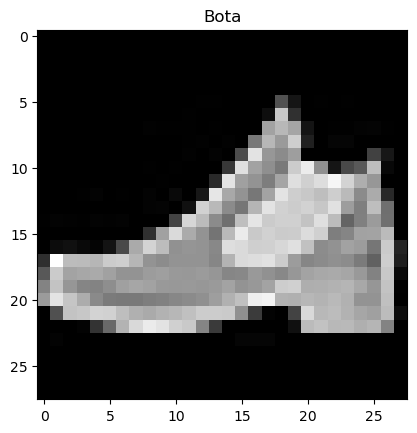

In [117]:
matriz_0 = df_fashion_train.drop("label", axis=1).iloc[1].values.reshape(28,28)
plt.imshow(matriz_0, cmap='gray', vmin=0, vmax=255) 
plt.title(nombre_prenda[df_fashion_train['label'][1]])
plt.show()

Text(0.5, 1.0, 'Cartera')

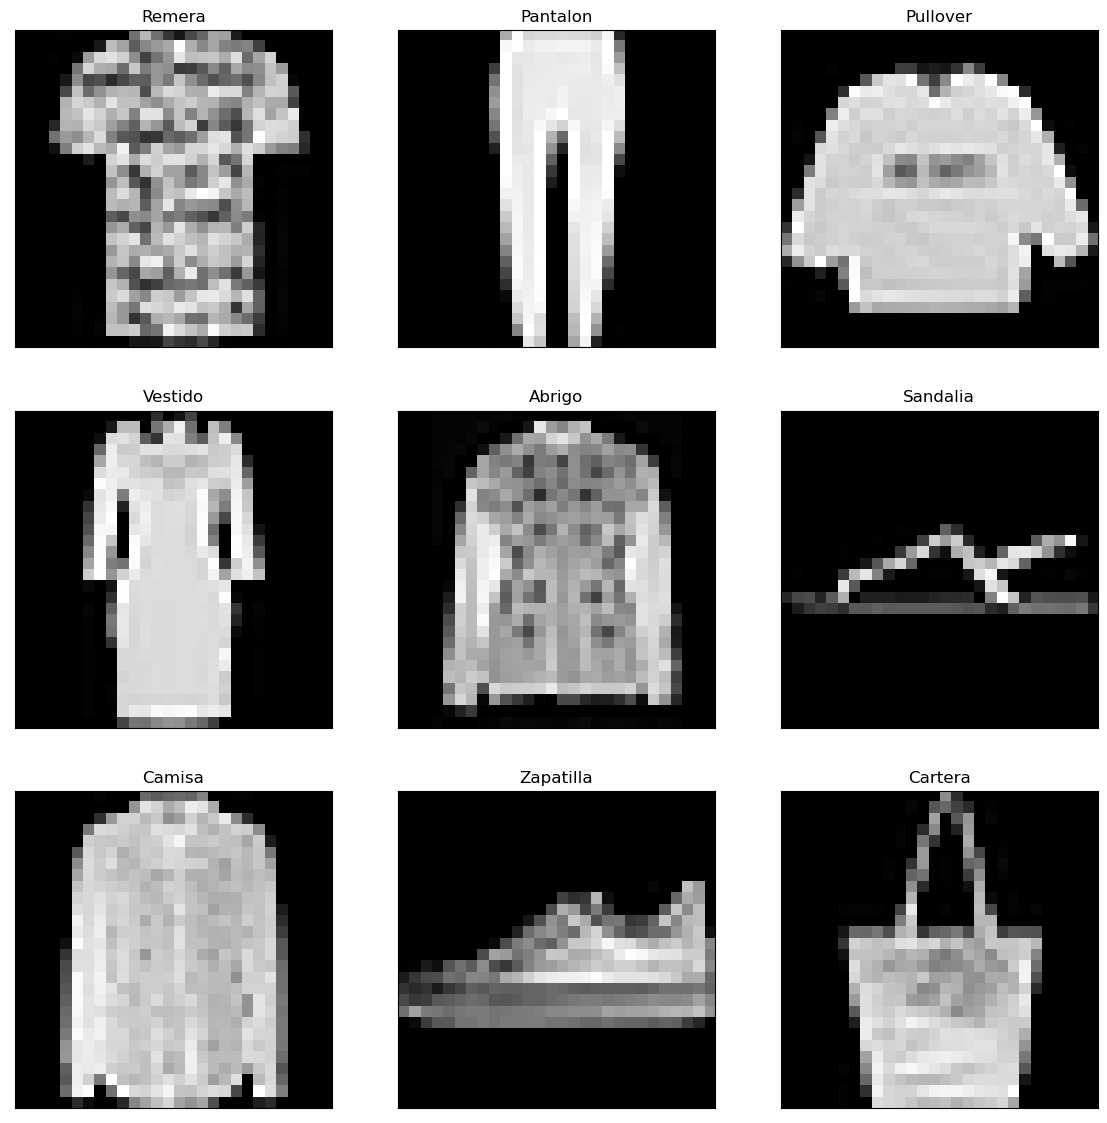

In [118]:
# Graficamos uno por cada categoria
fig, axs = plt.subplots(3,3, figsize=(14,14))
plt.setp(axs, xticks=[], yticks=[]) # Borramos los valores de los ejes para que se vean mas claras las imagenes

axs[0,0].imshow(df_fashion_train.drop("label", axis=1).iloc[3].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Remera')

axs[0,1].imshow(df_fashion_train.drop("label", axis=1).iloc[29].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title('Pantalon')

axs[0,2].imshow(df_fashion_train.drop("label", axis=1).iloc[0].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[0,2].set_title('Pullover')

axs[1,0].imshow(df_fashion_train.drop("label", axis=1).iloc[4].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title('Vestido')

axs[1,1].imshow(df_fashion_train.drop("label", axis=1).iloc[5].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title('Abrigo')

axs[1,2].imshow(df_fashion_train.drop("label", axis=1).iloc[7].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[1,2].set_title('Sandalia')

axs[2,0].imshow(df_fashion_train.drop("label", axis=1).iloc[2].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[2,0].set_title('Camisa')

axs[2,1].imshow(df_fashion_train.drop("label", axis=1).iloc[21].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[2,1].set_title('Zapatilla')

axs[2,2].imshow(df_fashion_train.drop("label", axis=1).iloc[9].values.reshape(28,28), cmap='gray', vmin=0, vmax=255)
axs[2,2].set_title('Cartera')


In [119]:
# Me creo lista de pixeles (se podia hacer con columns tambien)
lista = []
for i in range(1,785):
    pixel = 'pixel' + str(i)
    lista.append(pixel)
    
# Chequeo si hay filas que tengan todos los valores iguales
iguales = []
for i in range(df_fashion_train.shape[0]):
    numero = df_fashion_train.iloc[i].nunique()
    if numero==1:
        iguales.append(i)


In [123]:
describe = df_fashion_filtrado.describe()

In [124]:
# Chequeamos los rangos
describe.loc['min'].value_counts()
describe.loc['max'].value_counts()

255.0    731
227.0      4
233.0      4
245.0      3
254.0      3
239.0      3
252.0      2
248.0      2
230.0      2
246.0      2
189.0      2
250.0      2
232.0      1
236.0      1
249.0      1
16.0       1
253.0      1
244.0      1
188.0      1
81.0       1
237.0      1
206.0      1
212.0      1
211.0      1
36.0       1
194.0      1
219.0      1
167.0      1
105.0      1
180.0      1
220.0      1
222.0      1
224.0      1
164.0      1
226.0      1
170.0      1
Name: max, dtype: int64

In [125]:
remeras = df_fashion_train[df_fashion_train['label'] == 0]  
pantalones = df_fashion_train[df_fashion_train['label'] == 1]
pullovers = df_fashion_train[df_fashion_train['label'] == 2]
botas = df_fashion_train[df_fashion_train['label'] == 9]

# Calculamos el promedio de los pixeles de cada grupo
remera_promedio = np.mean(remeras, axis=1)
pantalon_promedio = np.mean(pantalones, axis=1)
pullover_promedio = np.mean(pullovers, axis=1)
bota_promedio = np.mean(botas, axis=1)

# Calculamos la correlacion
correlacion_remera_pantalon = np.corrcoef(remera_promedio, pantalon_promedio)[0,1]
correlacion_remera_pullover = np.corrcoef(remera_promedio, pullover_promedio)[0, 1]
correlacion_remera_bota = np.corrcoef(remera_promedio, bota_promedio)[0, 1]

print("Correlación entre remera y pantalón:", correlacion_remera_pantalon)
print("Correlación entre remera y pullover:", correlacion_remera_pullover)
print("Correlación entre remera y bota:", correlacion_remera_bota)

Correlación entre remera y pantalón: -0.004204362458998397
Correlación entre remera y pullover: 0.008354487441899148
Correlación entre remera y bota: -0.025806825202094503


Vemos que es mas facil diferenciar entre remeras y pantalones o pullovers que remeras y botas. Aunque visualmente podriamos decir que pareceria ser mas dificil diferenciar entre pullovers, remeras y camisas, y mas facil diferenciar entre una remera de una bota por ejemplo.

In [33]:
import random

In [34]:
df_fashion_train[df_fashion_train['label']==3].shape

(6000, 785)

In [35]:
indices_vestidos = df_fashion_train[df_fashion_train['label']==3].index

In [36]:
vestidos_unicos = df_fashion_train.iloc[indices_vestidos].drop_duplicates()

In [37]:
# Vemos que hay muchos vestidos distintos
vestidos_unicos.shape

(5997, 785)

Text(0.5, 1.0, 'Vestido 3')

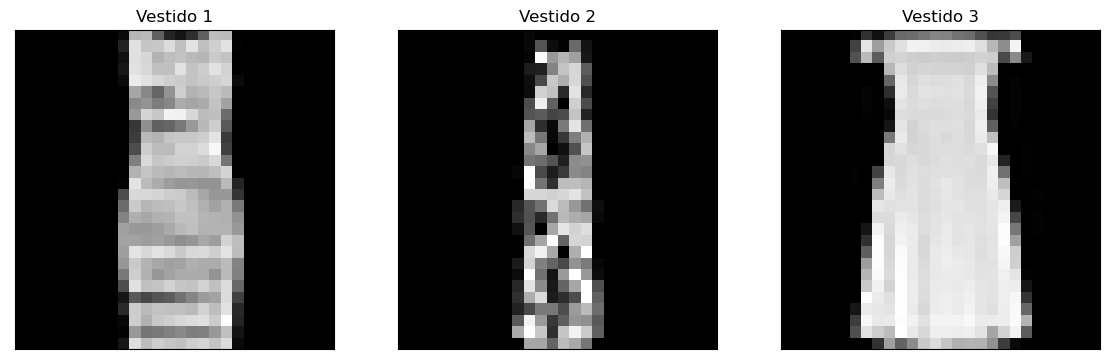

In [38]:
# Como no se especifico una semilla, el siguiente codigo se puede ejecutar multiples veces para ver diversos resultados.

vestido1 = df_fashion_train.drop("label", axis=1).iloc[indices_vestidos[random.randint(1,6000)]].values.reshape(28,28)
vestido2 = df_fashion_train.drop("label", axis=1).iloc[indices_vestidos[random.randint(1,6000)]].values.reshape(28,28)
vestido3 = df_fashion_train.drop("label", axis=1).iloc[indices_vestidos[random.randint(1,6000)]].values.reshape(28,28)

fig, axs = plt.subplots(1,3, figsize=(14,14))
plt.setp(axs, xticks=[], yticks=[]) # Borramos los valores de los ejes para que se vean mas claras las imagenes

axs[0].imshow(vestido1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Vestido 1')

axs[1].imshow(vestido2, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Vestido 2')

axs[2].imshow(vestido3, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Vestido 3')